In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('AbandonoEmpleados.csv', sep=';', index_col='id', na_values='#N/D')
data

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,conciliacion,anos_compania,anos_en_puesto,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,3.0,...,Baja,80,0,8,0,NaN,6,NaN,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,2.0,...,Muy_Alta,80,1,10,3,NaN,10,NaN,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,1,Muy_Alta,2.0,...,Media,80,0,7,3,NaN,0,2.0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,1,Muy_Alta,3.0,...,Alta,80,0,8,3,NaN,8,3.0,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,1,Baja,3.0,...,Muy_Alta,80,1,6,3,NaN,2,NaN,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,1,Alta,4.0,...,Alta,80,1,17,3,NaN,5,4.0,0,3
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,1,Muy_Alta,2.0,...,Baja,80,1,9,5,NaN,7,NaN,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,1,Media,4.0,...,Media,80,1,6,0,NaN,6,NaN,0,3


## Análisis exploratorio

###Análisis de nulos

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   object 
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1369 non-null   object 
 6   carrera                   1470 non-null   object 
 7   empleados                 1470 non-null   int64  
 8   satisfaccion_entorno      1470 non-null   object 
 9   sexo                      1271 non-null   float64
 10  implicacion               1452 non-null   object 
 11  nivel_laboral             1470 non-null   int64  
 12  puesto                    1470 non-null   object 
 13  satisfaccion_trabajo      1394 non-null   object 
 14  estado_civil 

Existen variables con una cantidad considerable de nulos.

In [4]:
data.isna().sum().sort_values(ascending=False)

,0
anos_en_puesto,1238
conciliacion,1011
sexo,199
educacion,101
satisfaccion_trabajo,76
implicacion,18
edad,0
nivel_acciones,0
evaluacion,0
satisfaccion_companeros,0


Observemos que las columnas anos_en_puesto y concilacion tienen demasiados nulos, por lo que eliminaremos estas columnas.

In [5]:
data.drop(columns=['anos_en_puesto','conciliacion'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   object 
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1369 non-null   object 
 6   carrera                   1470 non-null   object 
 7   empleados                 1470 non-null   int64  
 8   satisfaccion_entorno      1470 non-null   object 
 9   sexo                      1271 non-null   float64
 10  implicacion               1452 non-null   object 
 11  nivel_laboral             1470 non-null   int64  
 12  puesto                    1470 non-null   object 
 13  satisfaccion_trabajo      1394 non-null   object 
 14  estado_civil 

Las variables sexo, educacion, satisfaccion_trabajo e implicacion tambien tienen valores nulos pero no los suficientes, por lo que se procederá a imputarlas.

### Análisis exploratorio de variables categóricas

In [6]:
def graficos_eda_categoricos(cat):
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    fig, ax = plt.subplots(nrows=filas, ncols=2, figsize=(16, filas*6))

    ax = ax.flat

    for i, var in enumerate(cat):
        cat[var].value_counts().plot.barh(ax=ax[i])
        ax[i].set_title(var, fontsize=12, fontweight='bold')
        ax[i].set_xlabel('')
        ax[i].set_ylabel('')
        ax[i].tick_params(labelsize=12)

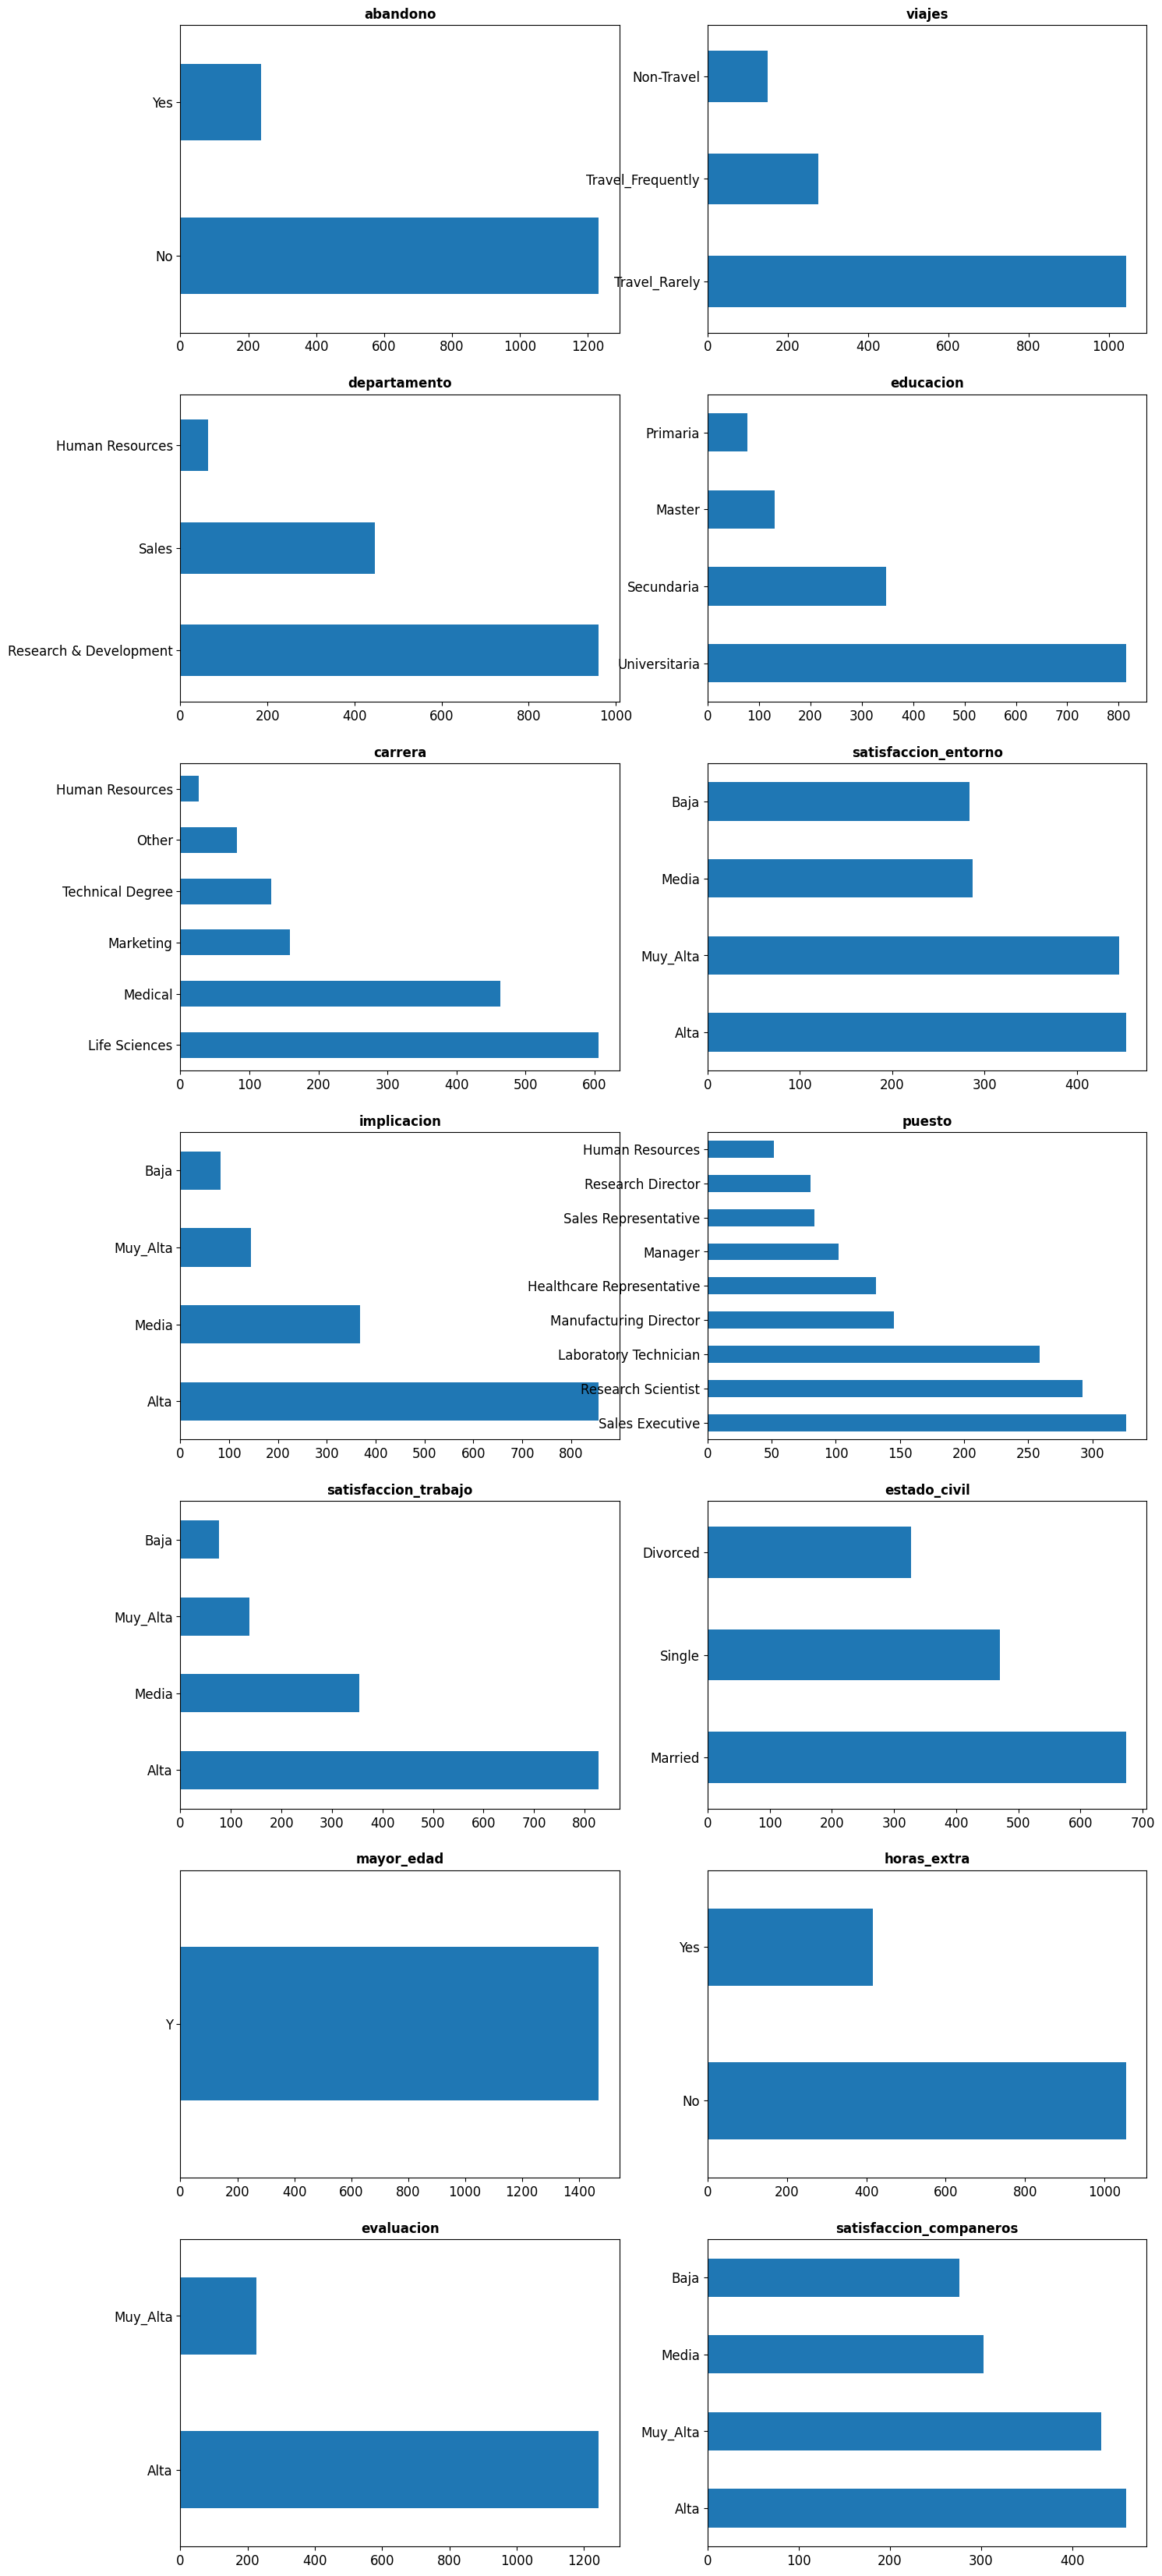

In [7]:
graficos_eda_categoricos(data.select_dtypes('O'))

Notemos que la variable mayor_edad tiene solo un valor, por lo que podemos eliminarla. \\
Además, las variables educacion, satisfaccion_trabajo e implicacion se imputarán con los valores más comunes de cada variable, esto es, 'Universitaria', 'Alta' y 'Alta', respectivamente.


In [8]:
data.drop(columns=['mayor_edad'], inplace=True)
data['educacion'] = data['educacion'].fillna('Universitaria')
data['satisfaccion_trabajo'] = data['satisfaccion_trabajo'].fillna('Alta')
data['implicacion'] = data['implicacion'].fillna('Alta')

### Análisis exploratorio de variables numéricas

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
edad,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.0,60.0
distancia_casa,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
empleados,1470.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
sexo,1271.0,2.727773,0.720788,1.0,2.0,3.0,3.0,4.0
nivel_laboral,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.0,5.0
salario_mes,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
num_empresas_anteriores,1470.0,2.693197,2.498009,0.0,1.0,2.0,4.0,9.0
incremento_salario_porc,1470.0,15.209524,3.659938,11.0,12.0,14.0,18.0,25.0
horas_quincena,1470.0,80.000000,0.000000,80.0,80.0,80.0,80.0,80.0
nivel_acciones,1470.0,0.793878,0.852077,0.0,0.0,1.0,1.0,3.0


Observemos que las variables empleados y horas_quincena tienen una desviación estándar igual a 0, lo que quiere decir que son variables de un sólo valor, por lo que debemos eliminarlas. \\
Además, la variable sexo tiene 4 valores, pero se desconocen el significado de estos valores, por lo que lo mejor es eliminarla.

In [10]:
data.drop(columns=['empleados', 'horas_quincena', 'sexo'], inplace=True)
data

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,horas_extra,incremento_salario_porc,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Yes,11,Alta,Baja,0,8,0,6,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,No,23,Muy_Alta,Muy_Alta,1,10,3,10,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Yes,15,Alta,Media,0,7,3,0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Yes,11,Alta,Alta,0,8,3,8,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,No,12,Alta,Muy_Alta,1,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,No,17,Alta,Alta,1,17,3,5,0,3
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,No,15,Alta,Baja,1,9,5,7,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Yes,20,Muy_Alta,Media,1,6,0,6,0,3


### Generación de insights

#### Tasa de abandono

In [11]:
data['abandono'].value_counts(normalize=True)*100

,proportion
abandono,
No,83.877551
Yes,16.122449


Se tiene una tasa de abandono del 16% en la empresa.

#### ¿Existe algún perfil de empleado que deja la empresa?

In [12]:
#Variable categórica a variable númerica
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['abandono'] = le.fit_transform(data['abandono'])

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   edad                      1470 non-null   int64 
 1   abandono                  1470 non-null   int64 
 2   viajes                    1470 non-null   object
 3   departamento              1470 non-null   object
 4   distancia_casa            1470 non-null   int64 
 5   educacion                 1470 non-null   object
 6   carrera                   1470 non-null   object
 7   satisfaccion_entorno      1470 non-null   object
 8   implicacion               1470 non-null   object
 9   nivel_laboral             1470 non-null   int64 
 10  puesto                    1470 non-null   object
 11  satisfaccion_trabajo      1470 non-null   object
 12  estado_civil              1470 non-null   object
 13  salario_mes               1470 non-null   int64 
 14  num_empresas_anteriores   147

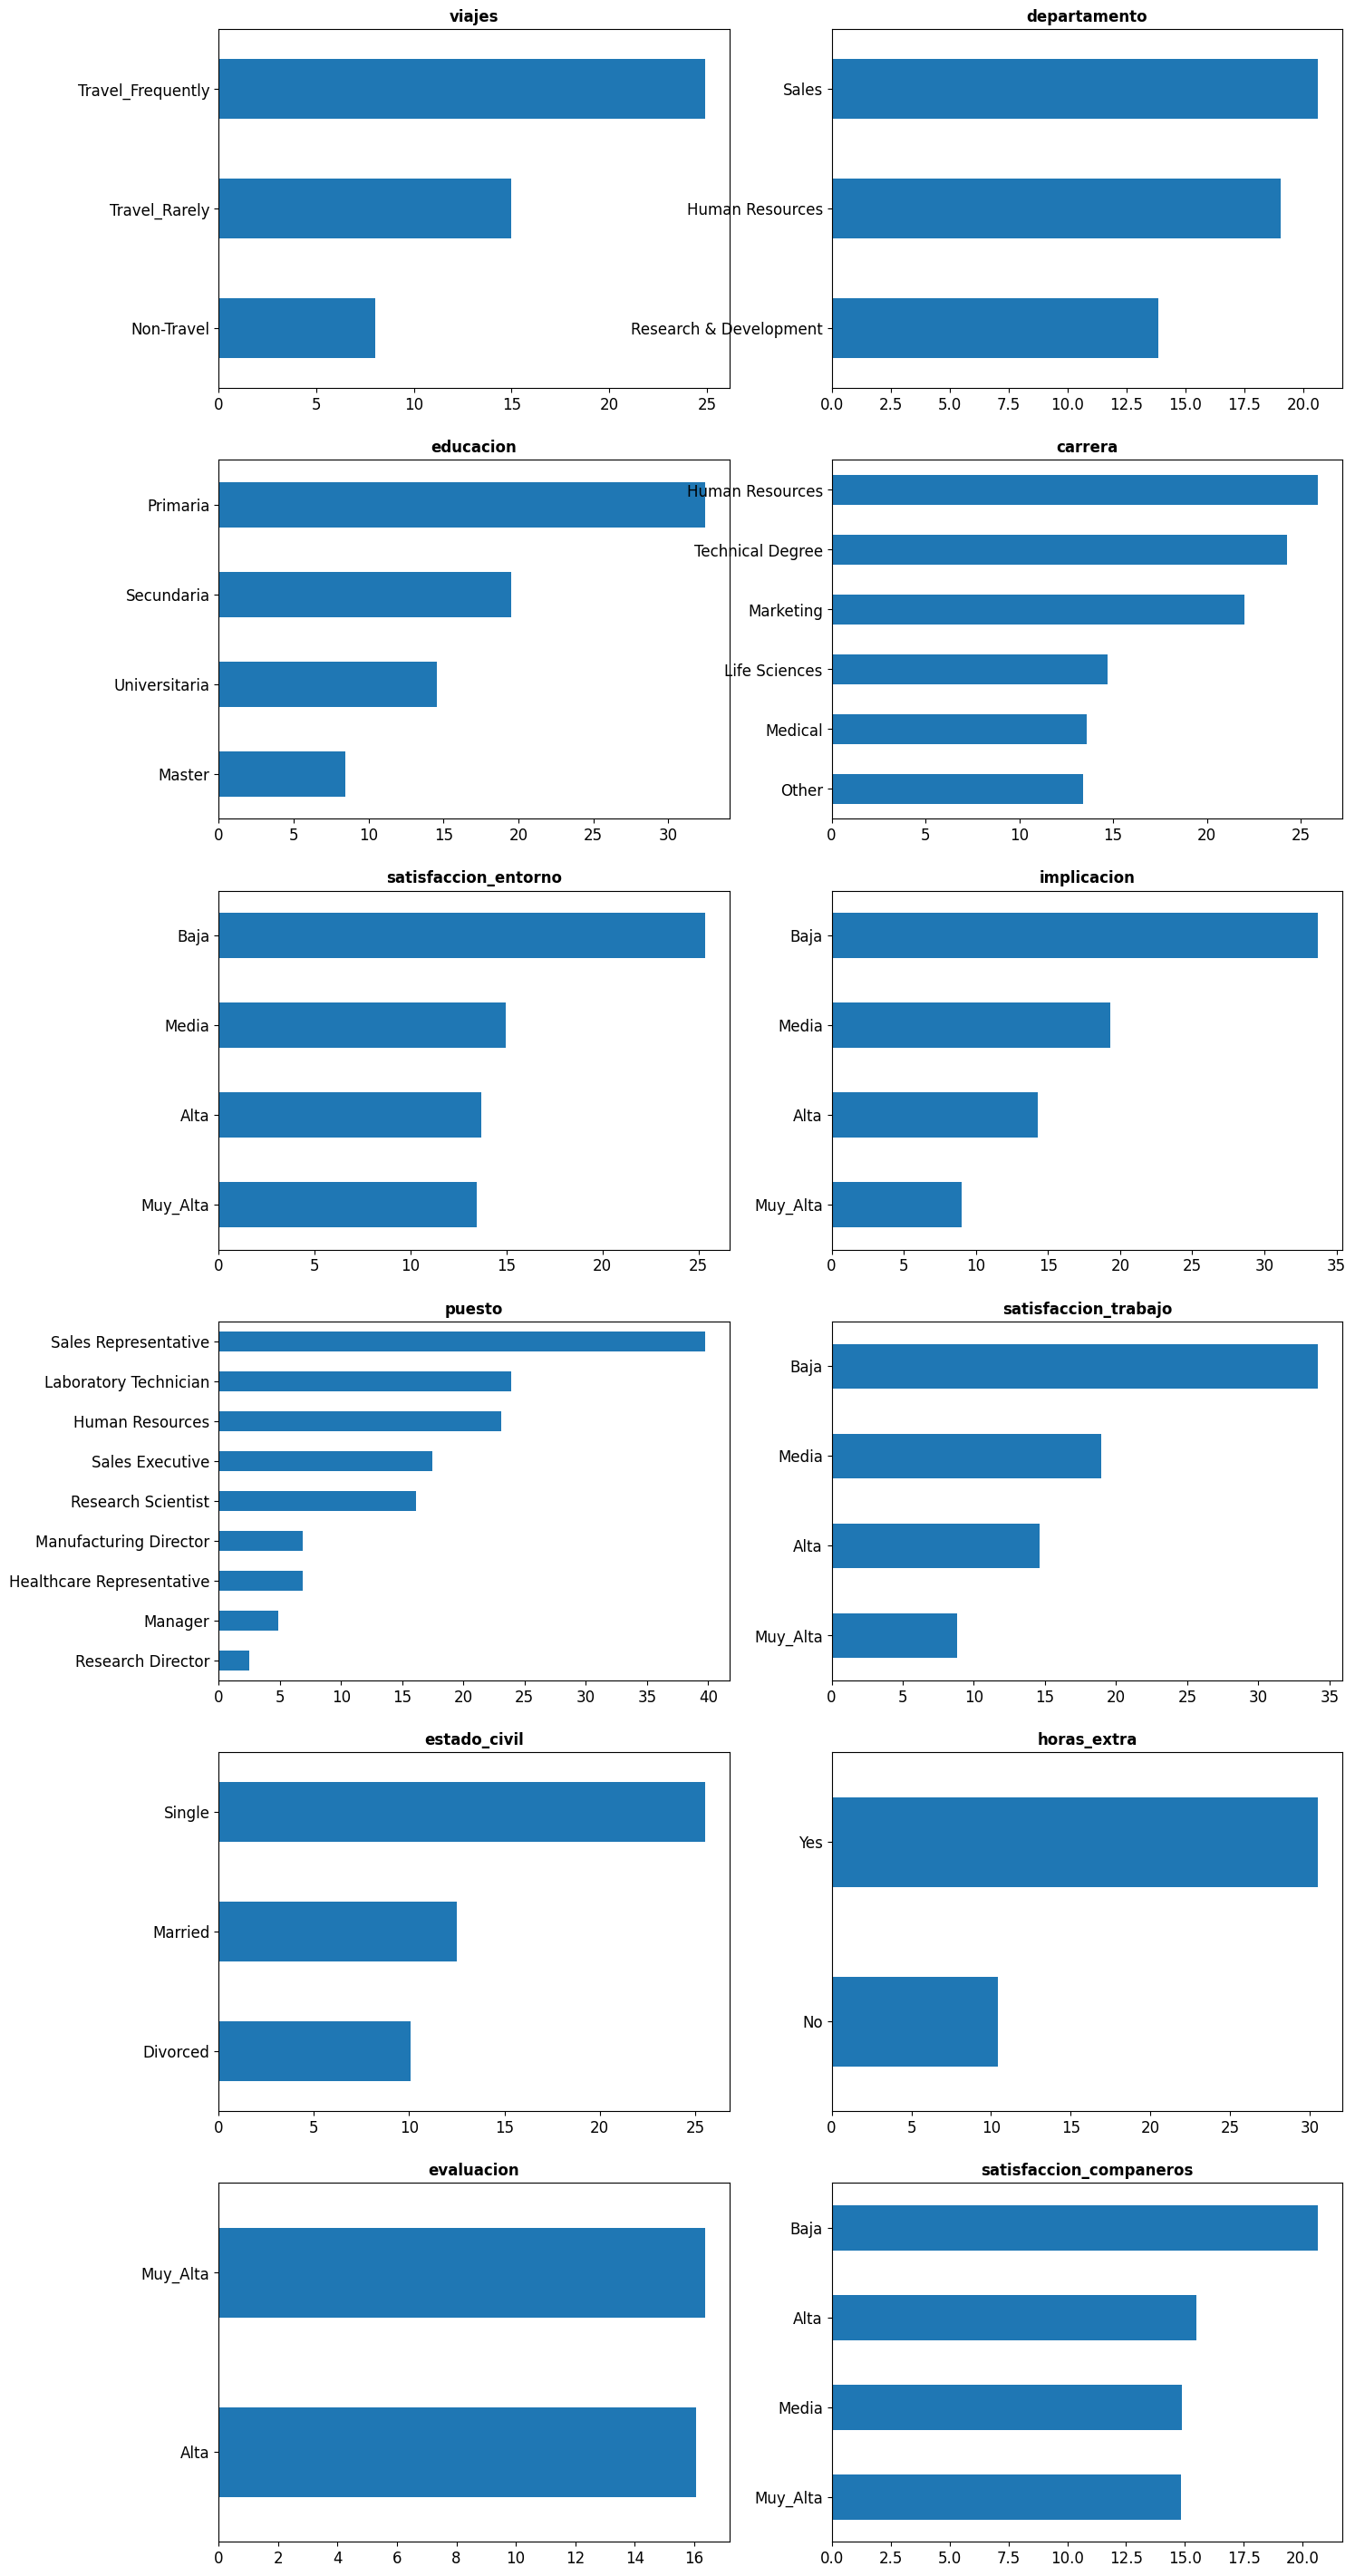

In [14]:
columnas = data.select_dtypes('O').columns

from math import ceil
filas = ceil(len(columnas) / 2)
fig, ax = plt.subplots(nrows=filas, ncols=2, figsize=(16, filas*6))
ax = ax.flat

for i, var in enumerate(columnas):
    temp = data.groupby(var).abandono.mean().sort_values(ascending=True)*100
    temp.plot.barh(ax=ax[i])
    ax[i].set_title(var, fontsize=12, fontweight='bold')
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].tick_params(labelsize=12)

Notemos que las variables departamento, carrera, evaluación y satisfaccion_companeros no tienen el impacto suficiente para que un empleado abandone. \\
Sin embargo, las características que muestran mayor impacto en el abandono de los empleados son:
- Viaja frecuentemente.
- Educación primaria.
- Baja satisfacción en el entorno.
- Implicación baja.
- Trabaja en ventas.
- Baja satisfacción en el trabajo.
- Solteros.
- Trabajan horas extras.

#### ¿Cuál es el impacto económico de este problema?

Según el estudio "[Cost of Turnover](https://www.americanprogress.org/article/there-are-significant-business-costs-to-replacing-employees/)" del Center for American Progress:
- El coste de la fuga de los empleados que ganan menos de \$30000 es del 16.1% de su salario.
- El coste de la fuga de los empleados que ganan entre \$30000-\$50000 es del 19.7% de su salario.
- El coste de la fuga de los empleados que ganan entre \$50000-\$75000 es del 20.4% de su salario.
- El coste de la fuga de los empleados que ganan más de \$75000 es del 21% de su salario.

In [15]:
#Creamos un nueva variable salario_ano del empleado
data['salario_ano'] = data.salario_mes.transform(lambda x: x*12)
data


,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,incremento_salario_porc,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,11,Alta,Baja,0,8,0,6,0,5,71916
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,23,Muy_Alta,Muy_Alta,1,10,3,10,1,7,61560
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,15,Alta,Media,0,7,3,0,0,0,25080
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,11,Alta,Alta,0,8,3,8,3,0,34908
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,12,Alta,Muy_Alta,1,6,3,2,2,2,41616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,17,Alta,Alta,1,17,3,5,0,3,30852
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,15,Alta,Baja,1,9,5,7,1,7,119892
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,20,Muy_Alta,Media,1,6,0,6,0,3,73704


In [16]:
#Obtener el costo de fuga de cada empleado
condiciones = [ data['salario_ano'] <= 30000,
               ((data['salario_ano'] > 30000) & (data['salario_ano'] <= 50000)),
               ((data['salario_ano'] > 50000) & (data['salario_ano'] <= 75000)),
                data['salario_ano'] > 75000 ]
resultados = [data.salario_ano*0.161, data.salario_ano*0.197, data.salario_ano*0.204, data.salario_ano*0.21]
data['costo_fuga'] = np.select(condiciones, resultados, default=0)
data

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,costo_fuga
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Alta,Baja,0,8,0,6,0,5,71916,14670.864
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,Muy_Alta,Muy_Alta,1,10,3,10,1,7,61560,12558.240
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Alta,Media,0,7,3,0,0,0,25080,4037.880
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,Alta,0,8,3,8,3,0,34908,6876.876
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,Alta,Muy_Alta,1,6,3,2,2,2,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,Alta,Alta,1,17,3,5,0,3,30852,6077.844
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,Alta,Baja,1,9,5,7,1,7,119892,25177.320
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Muy_Alta,Media,1,6,0,6,0,3,73704,15035.616


#### ¿Cuánto ha costado a la empresa el abandono de los empleados?

In [17]:
costo_empresa = data.loc[data['abandono']==1].costo_fuga.sum()
costo_empresa

2719005.912

A la empresa le ha costado \$2,719,005.91 la fuga de empleados.

De las características que tienen impacto en el abandono de los empleados anteriormente mencionadas, la empresa se puede enfocar en las siguientes:
- Viaja frecuentemente.
- Implicación baja.
- Trabajan horas extras

#### ¿Cuánto nos cuesta que los empleados abandonen porque viajan frecuentemente? (pérdidas en Viaja = Frecuentemente)

In [18]:
perdidas_viajar = data.loc[(data['abandono']==1) & (data['viajes']=='Travel_Frequently')].costo_fuga.sum()
perdidas_viajar

702292.5839999998

#### ¿Cuánto nos cuesta que los empleados abandonen porque no están motivados? (pérdidas en implicación = Baja)

In [19]:
perdidas_implicacion = data.loc[(data['abandono']==1) & (data['implicacion']=='Baja')].costo_fuga.sum()
perdidas_implicacion

368672.688

#### ¿Cuánto nos cuesta que los empleados abandonen porque trabajan horas extras? (pérdidas en horas extra = Si)

In [20]:
perdidas_horas_extra = data.loc[(data['abandono']==1) & (data['horas_extra']=='Yes')].costo_fuga.sum()
perdidas_horas_extra

1415403.2040000001

#### ¿Cuánto dinero nos ahorraríamos si se reduce la fuga de empleados?

In [21]:
print(f'Reducir un 10% la fuga de empleados nos ahorraría ${int(costo_empresa*0.1)} cada año.')
print(f'Reducir un 20% la fuga de empleados nos ahorraría ${int(costo_empresa*0.2)} cada año.')
print(f'Reducir un 30% la fuga de empleados nos ahorraría ${int(costo_empresa*0.3)} cada año.')

Reducir un 10% la fuga de empleados nos ahorraría $271900 cada año.
Reducir un 20% la fuga de empleados nos ahorraría $543801 cada año.
Reducir un 30% la fuga de empleados nos ahorraría $815701 cada año.


#### Estrategias para reducir la fuga de empleados

Observamos, anteriormente, que el departamento que más fugas de empleados tiene es el departamento de ventas. ¿Tendría sentido crear un plan específico para ellos? \\
Calculemos el porcentaje de empleados de este departamento que abandonan la empresa.


In [22]:
#Porcentaje de empleados que dejan la empresa
total_ventas_pasado = len(data.loc[data.puesto == 'Sales Representative'])
abandono_ventas = len(data.loc[(data.puesto == 'Sales Representative') & (data['abandono'] == 1)])
porcentaje_abandono_ventas = abandono_ventas/total_ventas_pasado
print(f"El porcentaje de empleados del departamento de ventas que abandonan la empresa es de {round((abandono_ventas/total_ventas_pasado)*100,2)}%")

El porcentaje de empleados del departamento de ventas que abandonan la empresa es de 39.76%


Estimemos cuantos empleados abandonaran la empresa este año.

In [23]:
total_ventas_actual = len(data.loc[(data.puesto=='Sales Representative')&(data['abandono']==0)])
empleados_que_abandonaran = int(total_ventas_actual*porcentaje_abandono_ventas)
print(f'La cantidad de empleados que abandonarán la empresa es de {empleados_que_abandonaran}')

La cantidad de empleados que abandonarán la empresa es de 19


Si intentamos retener el 30% de ellos, ¿cuánto dinero puede suponer?

In [24]:
empleados_a_retener = int(empleados_que_abandonaran*0.3)
print(f'La cantidad de empleados a retener es de {empleados_a_retener}')
ahorro_retencion = data.loc[(data.puesto=='Sales Representative') & (data['abandono']==0),'costo_fuga'].sum()*porcentaje_abandono_ventas*0.3
print(f'El ahorro a la empresa por retener esos 5 empleados es de ${round(ahorro_retencion,2)}')

La cantidad de empleados a retener es de 5
El ahorro a la empresa por retener esos 5 empleados es de $37447.22


La cantidad es muy interesante, ya que nos puede servir como presupuesto para crear estrategias para poder cumplir con retener el 30% de empleados que abandonarían, y hasta obtener ganancias.

##Machine learning

In [25]:
data_ml = data.copy()
data_ml.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   int64  
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1470 non-null   object 
 6   carrera                   1470 non-null   object 
 7   satisfaccion_entorno      1470 non-null   object 
 8   implicacion               1470 non-null   object 
 9   nivel_laboral             1470 non-null   int64  
 10  puesto                    1470 non-null   object 
 11  satisfaccion_trabajo      1470 non-null   object 
 12  estado_civil              1470 non-null   object 
 13  salario_mes               1470 non-null   int64  
 14  num_empresas_

### Preparación de datos

#### Transformación de variables categóricas a númericas

In [26]:
from sklearn.preprocessing import OneHotEncoder

cat = data_ml.select_dtypes('O')

ohe = OneHotEncoder(sparse_output=False)

ohe.fit(cat)

cat_ohe = ohe.transform(cat)

cat_ohe = pd.DataFrame(cat_ohe, columns=ohe.get_feature_names_out(input_features=cat.columns)).reset_index(drop=True)

In [27]:
cat_ohe

,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,...,estado_civil_Married,estado_civil_Single,horas_extra_No,horas_extra_Yes,evaluacion_Alta,evaluacion_Muy_Alta,satisfaccion_companeros_Alta,satisfaccion_companeros_Baja,satisfaccion_companeros_Media,satisfaccion_companeros_Muy_Alta
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


#### DataFrame final

In [28]:
num = data_ml.select_dtypes('number').reset_index(drop=True)

In [29]:
data_ml = pd.concat([cat_ohe, num], axis=1)
data_ml

,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,educacion_Secundaria,educacion_Universitaria,...,num_empresas_anteriores,incremento_salario_porc,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,costo_fuga
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,8,11,0,8,0,6,0,5,71916,14670.864
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1,23,1,10,3,10,1,7,61560,12558.240
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,6,15,0,7,3,0,0,0,25080,4037.880
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1,11,0,8,3,8,3,0,34908,6876.876
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,9,12,1,6,3,2,2,2,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,4,17,1,17,3,5,0,3,30852,6077.844
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,4,15,1,9,5,7,1,7,119892,25177.320
1467,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1,20,1,6,0,6,0,3,73704,15035.616
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,2,14,0,17,3,9,0,8,64680,13194.720


### Modelización

#### Separación variables predictoras y objetivo

In [30]:
x = data_ml.drop(columns=['abandono'])
y = data_ml['abandono']

#### Separación train y test

In [31]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

### Entrenamiento del modelo

In [32]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=4)

dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

### Predicción y validación del modelo

In [33]:
#Predicción
y_pred = dt.predict_proba(x_test)[:, 1]
y_pred[:20]

array([0.09278351, 0.04634146, 0.08333333, 0.04634146, 0.26315789,
       0.10071942, 0.09278351, 0.04634146, 0.26315789, 0.41935484,
       0.36065574, 0.09278351, 0.26315789, 0.42105263, 0.09278351,
       0.09278351, 0.36065574, 0.09278351, 0.10071942, 0.04634146])

In [34]:
#Evaluación
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred)

0.6956643658326144

Obeservemos que obtiene una puntuación de 0.69, por lo que
podemos concluir que no es un buen modelo de predicción y se debe mejorar.

# Interpretación

## Diagrama del árbol

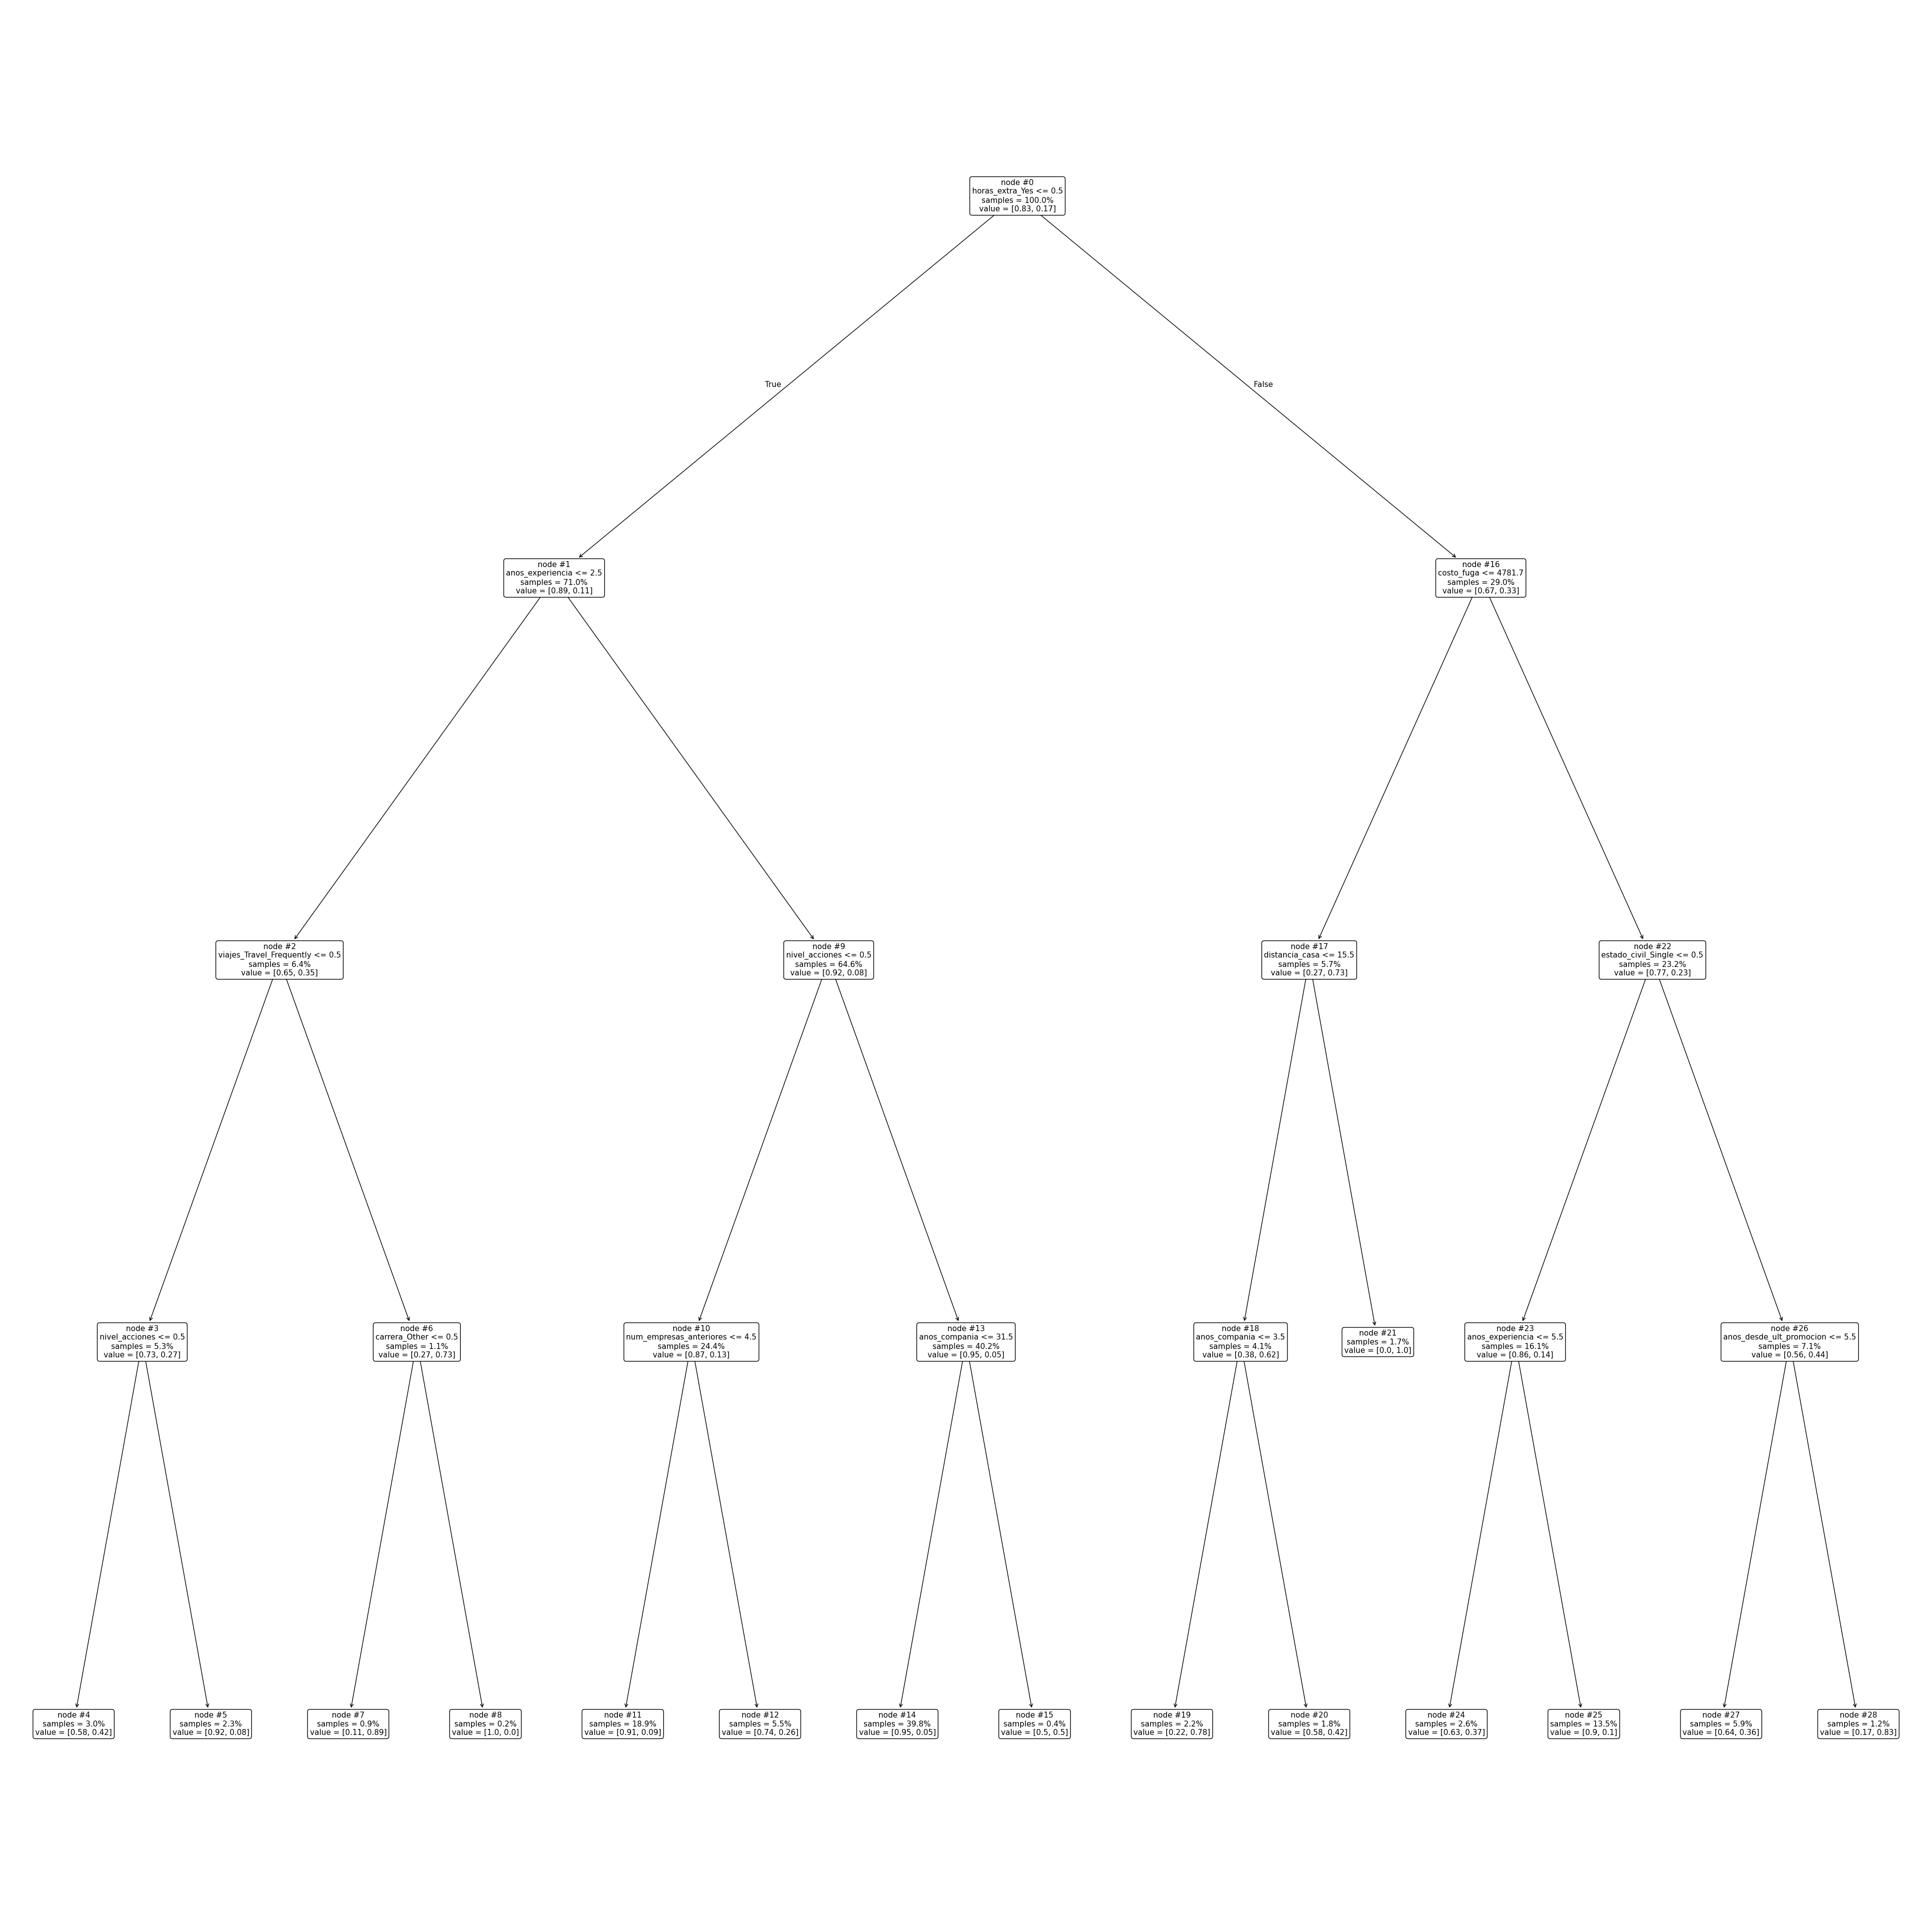

In [35]:
from sklearn.tree import plot_tree

plt.figure(figsize=(50,50))

plot_tree(dt,
          feature_names = x_test.columns,
          impurity = False,
          node_ids = True,
          proportion = True,
          rounded = True,
          precision = 2);

## Importancia de las variables

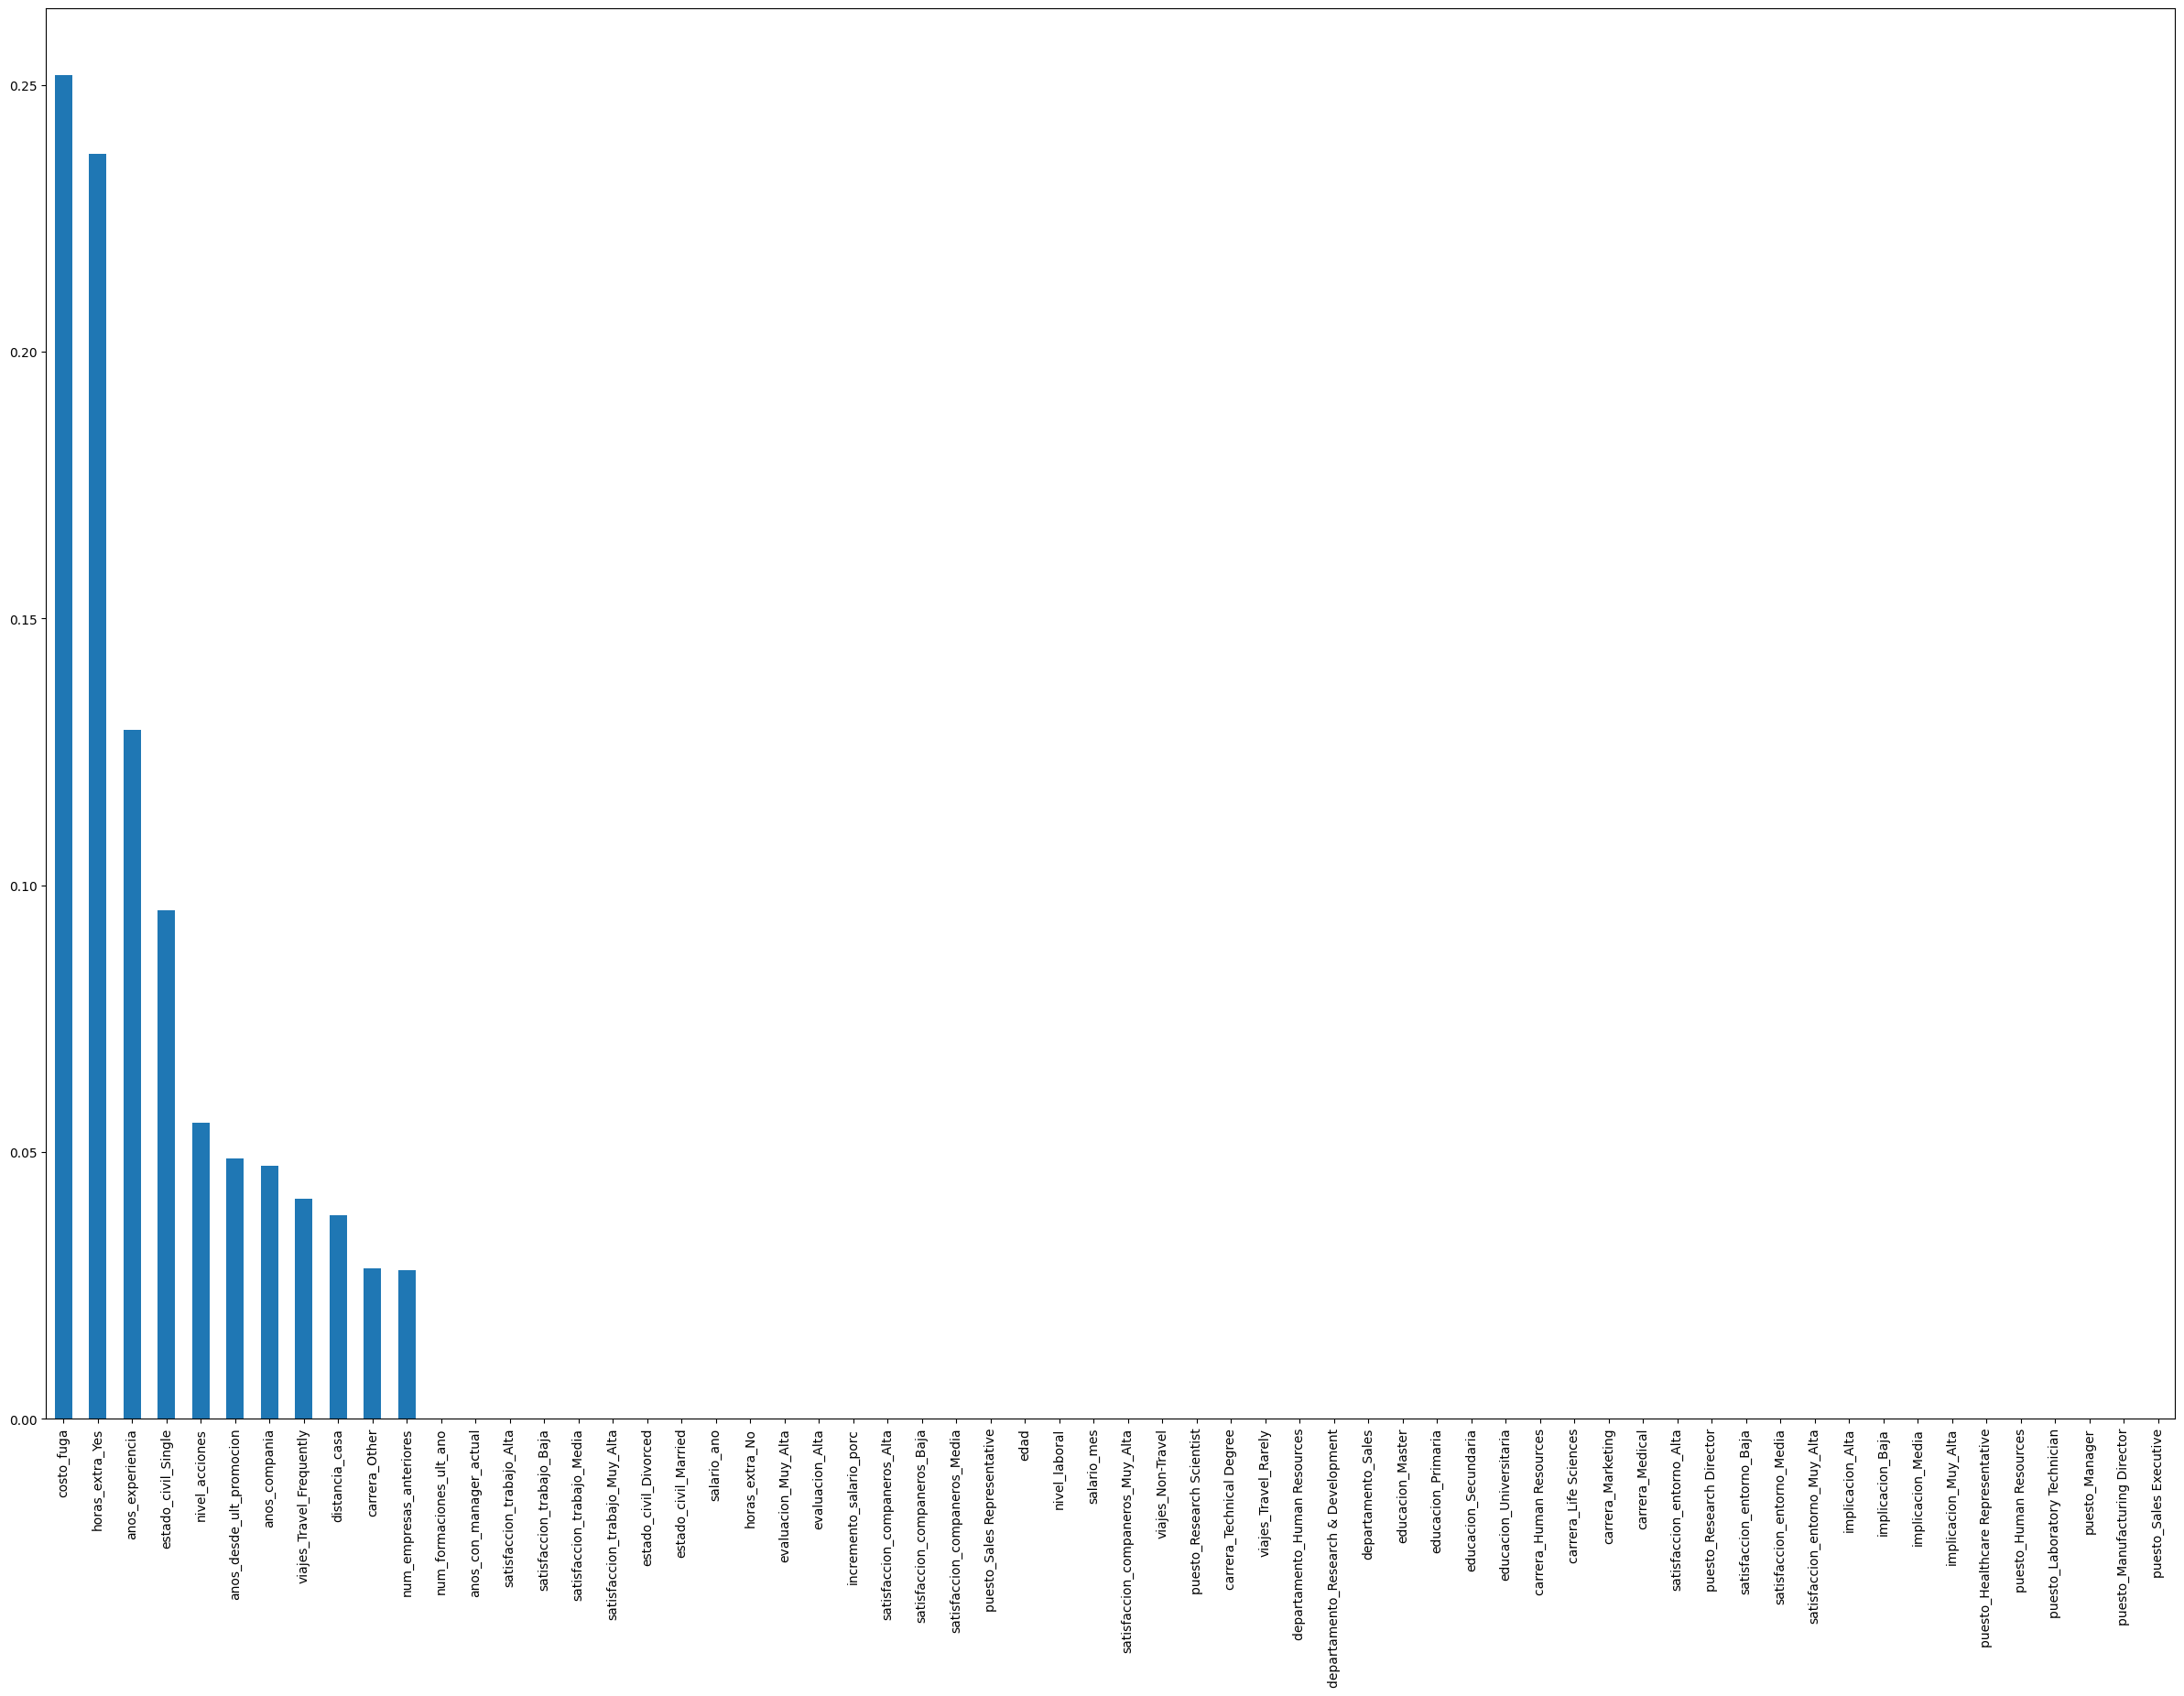

In [36]:
pd.Series(dt.feature_importances_,index = x_test.columns).sort_values(ascending = False).plot(kind = 'bar', figsize = (30,20));

Obeservemos que las variables que muestran gran impacto en el abandono de los empleados son el salario por año menor o igual que $29700 y si trabaja horas extra. \\

Agreguemos el scoring de abandono al data frame original.

In [37]:
data['scoring_abandono'] = dt.predict_proba(data_ml.drop(columns=['abandono']))[:, 1]
data

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,costo_fuga,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Baja,0,8,0,6,0,5,71916,14670.864,0.360656
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,Muy_Alta,1,10,3,10,1,7,61560,12558.240,0.046341
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Media,0,7,3,0,0,0,25080,4037.880,0.782609
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,0,8,3,8,3,0,34908,6876.876,0.100719
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,Muy_Alta,1,6,3,2,2,2,41616,8198.352,0.046341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,Alta,1,17,3,5,0,3,30852,6077.844,0.046341
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,Baja,1,9,5,7,1,7,119892,25177.320,0.046341
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Media,1,6,0,6,0,3,73704,15035.616,0.100719


Busquemos los 10 empleados con mayor scoring de abandono.

In [38]:
data.sort_values(by='scoring_abandono', ascending=False)[0:10]

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,costo_fuga,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,
1905,34,1,Non-Travel,Research & Development,16,Primaria,Technical Degree,Muy_Alta,Baja,1,...,Media,1,5,2,5,3,0,27684,4457.124,1.0
1767,43,1,Travel_Frequently,Research & Development,17,Universitaria,Technical Degree,Alta,Media,1,...,Muy_Alta,1,6,4,1,0,0,29244,4708.284,1.0
394,26,1,Travel_Rarely,Research & Development,16,Universitaria,Medical,Baja,Alta,1,...,Muy_Alta,1,5,2,3,0,2,28476,4584.636,1.0
952,25,1,Travel_Rarely,Sales,19,Secundaria,Marketing,Alta,Media,1,...,Alta,3,1,2,1,0,0,28956,4661.916,1.0
1108,33,1,Travel_Rarely,Research & Development,25,Secundaria,Medical,Baja,Media,1,...,Media,0,5,0,2,2,2,27756,4468.716,1.0
315,29,1,Travel_Rarely,Research & Development,18,Secundaria,Medical,Alta,Media,1,...,Alta,0,4,3,4,0,1,28668,4615.548,1.0
959,19,1,Travel_Rarely,Sales,21,Secundaria,Other,Muy_Alta,Media,1,...,Media,0,1,3,1,0,0,25452,4097.772,1.0
19,28,1,Travel_Rarely,Research & Development,24,Secundaria,Life Sciences,Alta,Media,1,...,Media,0,6,4,4,0,3,24336,3918.096,1.0
1273,25,1,Travel_Frequently,Sales,24,Primaria,Life Sciences,Alta,Baja,1,...,Muy_Alta,0,1,4,1,1,0,13416,2159.976,1.0


Ahora, calculemos el scoring de abandono por puesto.

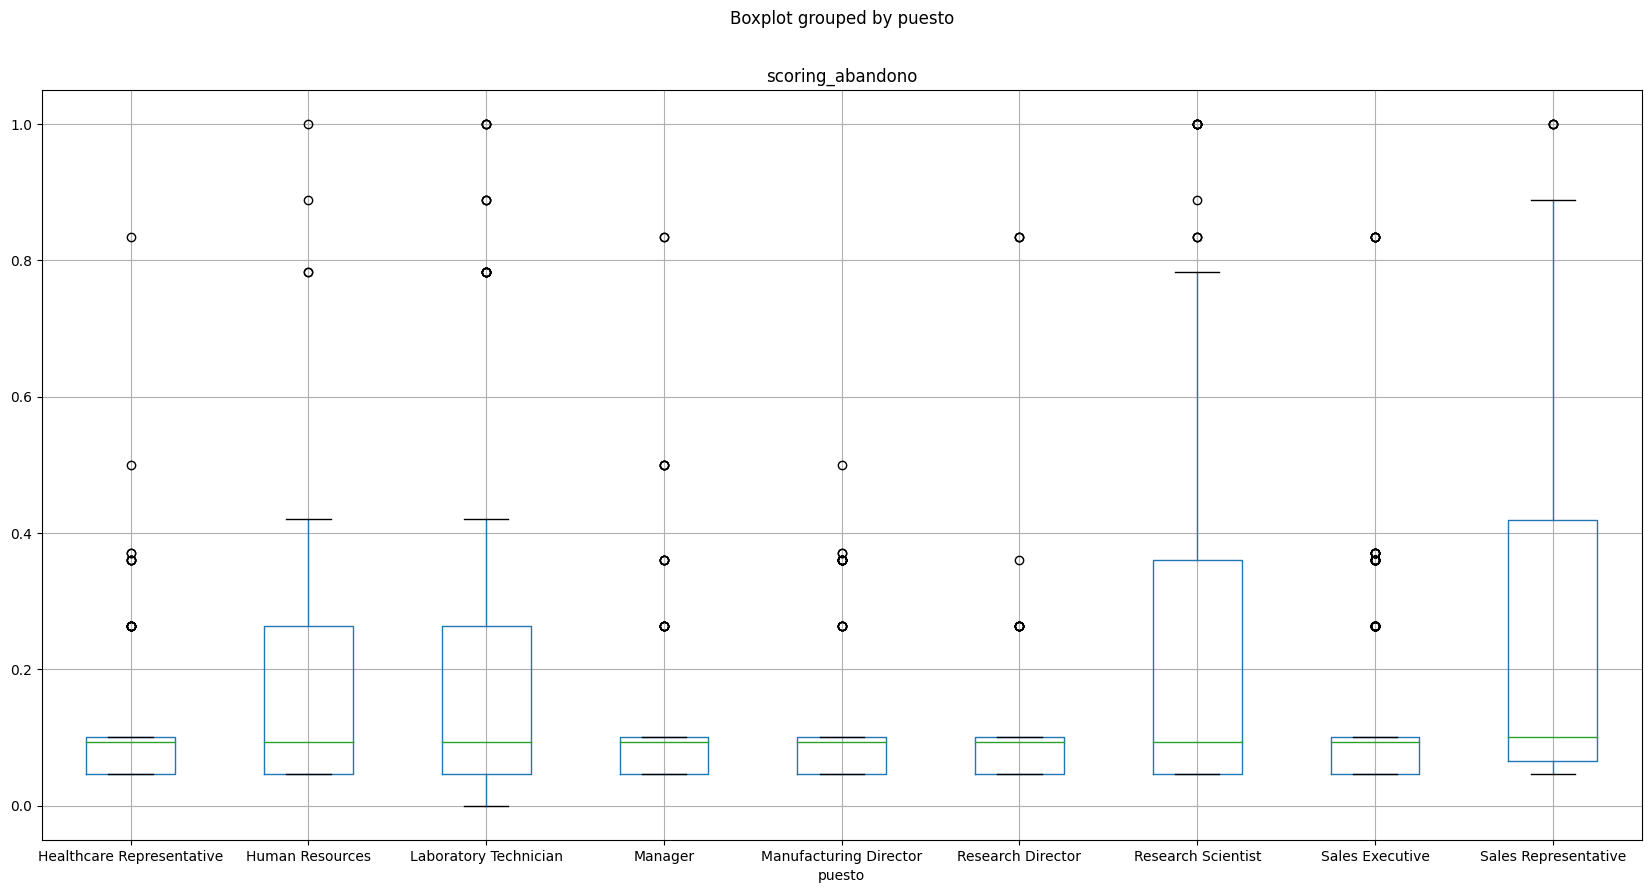

In [39]:
data.boxplot(column='scoring_abandono', by='puesto', figsize=(20,10));

Observemos que el puesto de ventas es el departamento que muestra mayores probabilidades de abandonar la empresa.

In [40]:
data.to_excel('Scoring_abandono.xlsx')